In [129]:
import numpy as np
import os
import re
import seaborn as sns 
import matplotlib.pyplot as plt

In [130]:
folder1 = 'Log1/'
folder2 = 'Log2/'
folder3 = 'Log3/'
folder4 = 'Log4/'
folder5 = 'Log5/'
folder6 = 'Log6/'

def create_log(folder, num_msg=False):
    files = sorted(os.listdir(folder))
    dt = {}
    for f in files:    
        dt[f] = None
    
    tot_msg = [0]*len(files)
    tot_cs = [0]*len(files)
    id = -1
    for f in files:
        id += 1
        with open(folder+f) as f1:
            # cnt = 0
            # cs = 0
            lines = f1.readlines()
            req = []
            recv_token = []
            for l in lines:
                if num_msg==False:
                    if 'want a token' in l:
                        req.append(re.split(' |:',l)[:2])
                    elif 'got a token' in l:
                        recv_token.append(re.split(' |:',l)[:2])
                else:
                    if 'got a token' in l:
                        tot_msg[id] += 1
                        tot_cs[id] += 1
                    elif 'recieved outstanding request' in l:
                        proc_rank = int(re.split(' |:|\.',l)[11])
                        tot_msg[proc_rank] += 1
                    
            if num_msg==False:
                a = np.zeros((len(recv_token),2))
                for i in range(len(recv_token)):
                    reqt = np.float64(req[i][0]) + np.float64(req[i][1])/60
                    recvt = np.float64(recv_token[i][0]) + np.float64(recv_token[i][1])/60
                    a[i] = (reqt, recvt)                
                dt[f] = a
                        
            tot_cs[id] += 1
                    
    if num_msg==False:
        return dt
    msgs = np.array(tot_msg)/np.array(tot_cs)
    # msgs = np.sum(np.array(tot_msg))/np.sum(np.array(tot_cs))
    # return tot_msg, tot_cs
    return np.sum(msgs)
    
dt1 = create_log(folder1)
dt2 = create_log(folder2)
dt3 = create_log(folder3)
dt4 = create_log(folder4)
dt5 = create_log(folder5)
dt6 = create_log(folder6)

# arr = []1
# time = {
#     'name': None,
#     'request-time': [],
#     'token_recv-time': []
# }


In [131]:
def find_mean(dt1):
    avg = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        avg.append(np.mean(diff))

    avg = np.array(avg)
    avg = np.mean(avg)
    return avg

# Np = 2
avg1 = find_mean(dt1)
print(avg1)
# Np = 3
avg2 = find_mean(dt2)
print(avg2)
# Np = 5
avg3 = find_mean(dt3)
print(avg3)
# Np = 8
avg4 = find_mean(dt4)
print(avg4)
# Np = 15
avg5 = find_mean(dt5)
print(avg5)
# Np = 20
avg6 = find_mean(dt6)
print(avg6)


0.045728989813242735
0.088040316012071
0.19963904326262397
0.3803272824813255
0.7828419987993631
1.0553104575163401


In [132]:
def find_max(dt1):
    mx = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        mx.append(np.max(diff))

    mx = np.array(mx)
    mx = np.max(mx)
    return mx


# Np = 2
mx1 = find_max(dt1)
print(mx1)
# Np = 3
mx2 = find_max(dt2)
print(mx2)
# Np = 5
mx3 = find_max(dt3)
print(mx3)
# Np = 8
mx4 = find_max(dt4)
print(mx4)
# Np = 15
mx5 = find_max(dt5)
print(mx5)
# Np = 20
mx6 = find_max(dt6)
print(mx6)

0.13333333333333997
0.20000000000000284
0.28333333333333854
0.5166666666666657
0.9333333333333336
1.25


In [133]:
def find_min(dt1):
    mn = []
    for key in dt1:
        val = dt1[key]
        diff = val[:,1] - val[:,0]
        diff_n = []
        for d in diff:
            if d<0:
                diff_n.append(d+60)
            else:
                diff_n.append(d)
            
        diff = np.array(diff_n).astype(np.float64)
#         print(diff)
        mn.append(np.min(diff))

    mn = np.array(mn)
    mn = np.min(mn)
    return mn


# Np = 2
mn1 = find_min(dt1)
print(mn1)
# Np = 3
mn2 = find_min(dt2)
print(mn2)
# Np = 5
mn3 = find_min(dt3)
print(mn3)
# Np = 8
mn4 = find_min(dt4)
print(mn4)
# Np = 15
mn5 = find_min(dt5)
print(mn5)
# Np = 20
mn6 = find_min(dt6)
print(mn6)

0.0
0.01666666666666572
0.016666666666672825
0.01666666666666572
0.01666666666666572
0.05000000000000426


In [134]:
# Count number of messages
c1 = create_log(folder1, num_msg=True)
c2 = create_log(folder2, num_msg=True)
c3 = create_log(folder3, num_msg=True)
c4 = create_log(folder4, num_msg=True)
c5 = create_log(folder5, num_msg=True)
c6 = create_log(folder6, num_msg=True)

print(c1)
print(c2)
print(c3)
print(c4)
print(c5)
print(c6)

3.9839033553569116
8.96759020805725
24.902911504846486
63.73579334760645
224.05825647782171
398.97142857142865


Text(0, 0.5, 'Time')

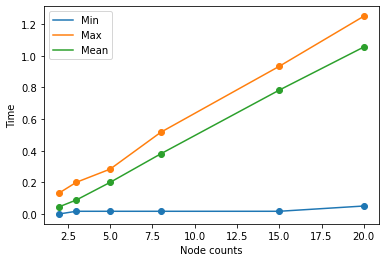

In [135]:
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5, mn6])
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5, mx6])
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5, avg6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5, mn6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5, mx6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5, avg6])
plt.legend(labels=["Min","Max", "Mean"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

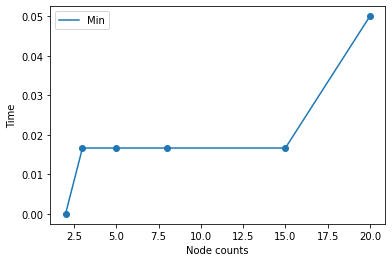

In [136]:
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5, mn6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[mn1, mn2, mn3, mn4, mn5, mn6])
plt.legend(labels=["Min"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

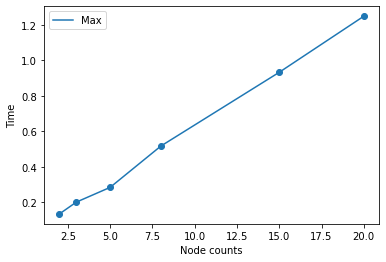

In [137]:
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5, mx6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[mx1, mx2, mx3, mx4, mx5, mx6])
plt.legend(labels=["Max"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Time')

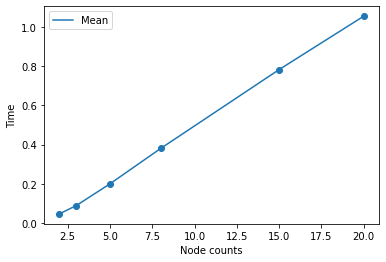

In [138]:
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5, avg6])
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[avg1, avg2, avg3, avg4, avg5, avg6])
plt.legend(labels=[ "Mean"])
plt.xlabel("Node counts")
plt.ylabel("Time")

Text(0, 0.5, 'Messages')

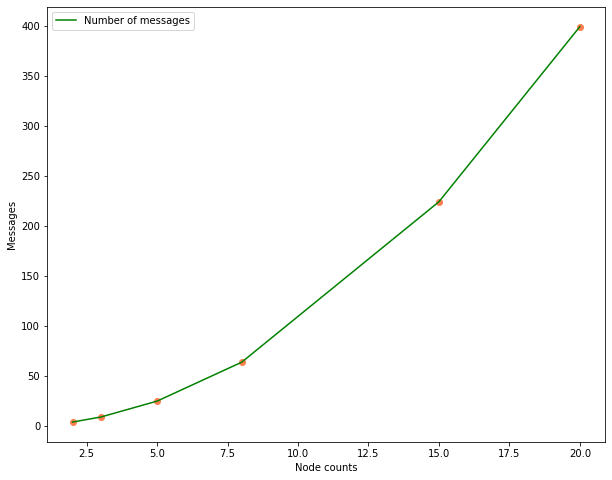

In [174]:
plt.figure(figsize=(10,8))
sns.lineplot(x=[2, 3, 5, 8, 15, 20], y=[c1, c2, c3, c4, c5, c6], color='green')
plt.scatter(x=[2, 3, 5, 8, 15, 20], y=[c1, c2, c3, c4, c5, c6], color='coral')
plt.legend(labels=["Number of messages"])
plt.xlabel("Node counts")
plt.ylabel("Messages")